In [17]:
# boilerplate cell for stuff that comes out of the box with R, probably
# copied from https://github.com/Azure/RNNForTimeSeriesForecasting, because I am new to this stuff
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as stats
import statsmodels.stats.api as sms
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_process import arma_generate_sample as arimasim
from glob import glob
from collections import UserDict
from IPython.display import Image, Markdown, display
from utils import Capturing
%matplotlib inline

# some kind soul ported a bunch of default R datasets (and more) into python, bless his soul
from pydataset import data as pdsd

pd.options.display.float_format = '{:,.4f}'.format
np.set_printoptions(precision=4)

### AR(1) process
Original:
```R
set.seed(2016); N=1000; phi = .4;
Z = rnorm(N,0,1); X=NULL; X[1] = Z[1];
for (t in 2:N) {
X[t] = Z[t] + phi*X[t-1] ;
}
X.ts = ts(X)
par(mfrow=c(2,1))
plot(X.ts,main="AR(1) Time Series on White Noise, phi=.4")
X.acf = acf(X.ts, main="AR(1) Time Series on White Noise, phi=.4")
```

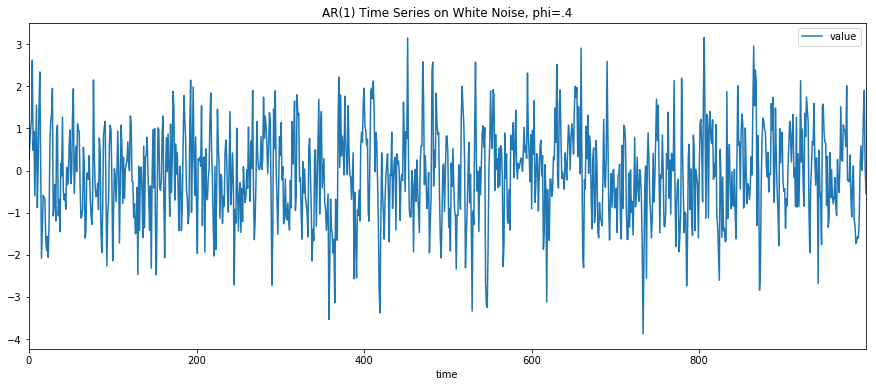

In [6]:
np.random.seed(2016)
N, phi = 1000, .4
Z = np.random.normal(size=N)
X = np.array([0.0 for z in Z])
X[0] = Z[0]
for t in range(1,N):
    X[t] = Z[t] + phi * X[t-1]
X = pd.DataFrame(np.array([np.array([i for i in range(len(X))]), X]).T, columns=["time","value"])
X.plot(x="time", y="value", title="AR(1) Time Series on White Noise, phi=.4",figsize=[15,6])

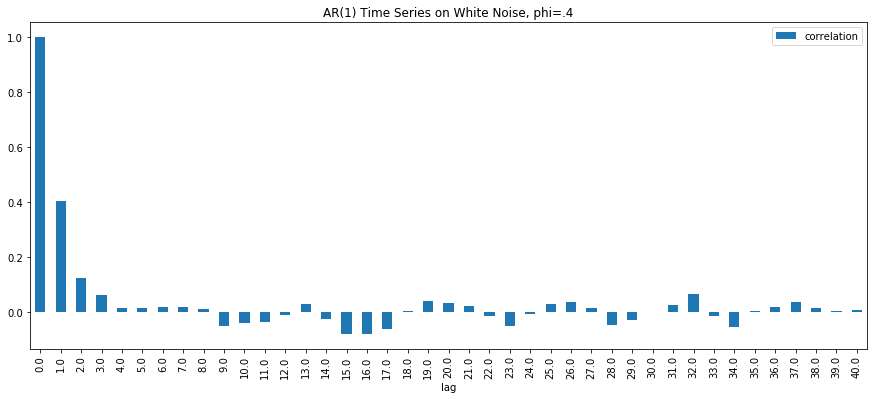

In [4]:
acfX = sts.acf(X['value'])
acfXframe = pd.DataFrame(np.array([np.array(range(len(acfX))),acfX]).T,columns=['lag','correlation'])
acfXframe[acfXframe["lag"]<=40].plot(x="lag",y="correlation",kind="bar",figsize=[15,6],title="AR(1) Time Series on White Noise, phi=.4")

Change phi to 1

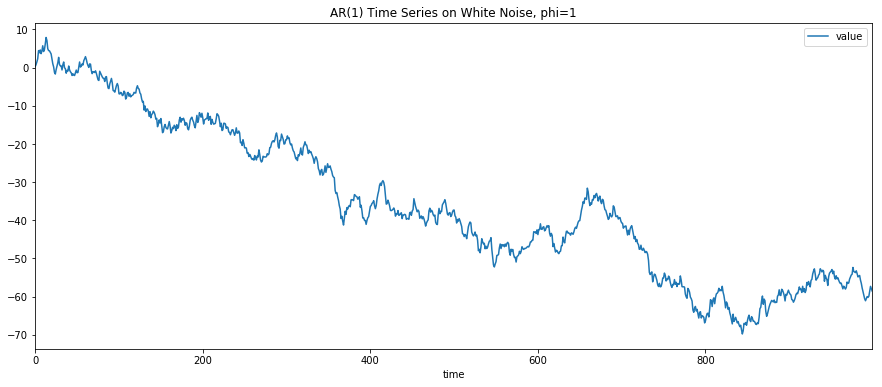

In [11]:
N, phi = 1000, 1.0

X = np.array([0.0 for z in Z])
X[0] = Z[0]
for t in range(1,N):
    X[t] = Z[t] + phi * X[t-1]
X = pd.DataFrame(np.array([np.array([i for i in range(len(X))]), X]).T, columns=["time","value"])
X.plot(x="time", y="value", title="AR(1) Time Series on White Noise, phi=1",figsize=[15,6])

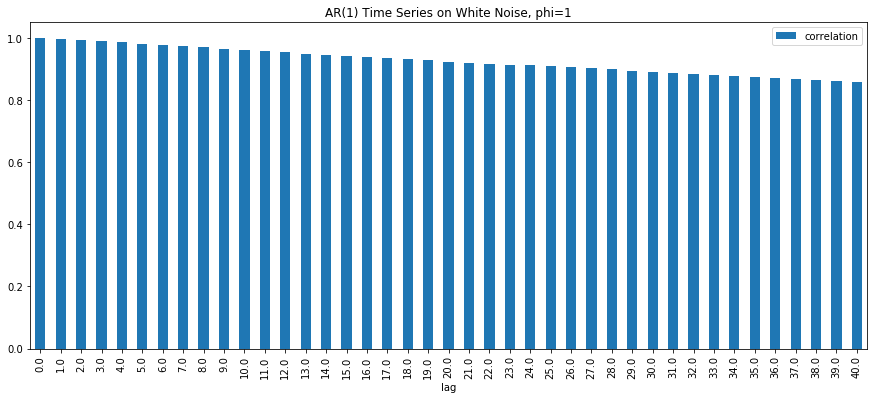

In [12]:
acfX = sts.acf(X['value'])
acfXframe = pd.DataFrame(np.array([np.array(range(len(acfX))),acfX]).T,columns=['lag','correlation'])
acfXframe[acfXframe["lag"]<=40].plot(x="lag",y="correlation",kind="bar",figsize=[15,6],title="AR(1) Time Series on White Noise, phi=1")

### AR(2) process
Original:
```R
set.seed(2017)
X.ts <- arima.sim(list(ar = c(.7, .2)), n=1000)
par(mfrow=c(2,1))
plot(X.ts,main="AR(2) Time Series, phi1=.7, phi2=.2")
X.acf = acf(X.ts, main="Autocorrelation of AR(2) Time Series")
```

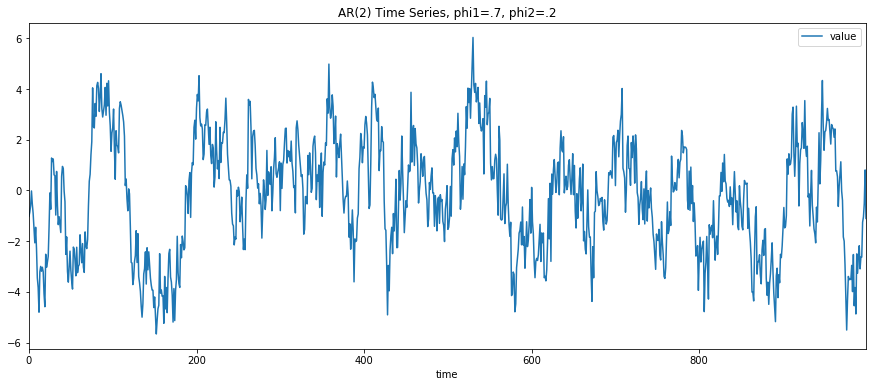

In [31]:
np.random.seed(2017)
X = arimasim(ar=[1,-.7,-.2],ma=[1],nsample=1000)
X = pd.DataFrame(np.array([np.array([i for i in range(len(X))]), X]).T, columns=["time","value"])
X.plot(x="time", y="value", title="AR(2) Time Series, phi1=.7, phi2=.2",figsize=[15,6])

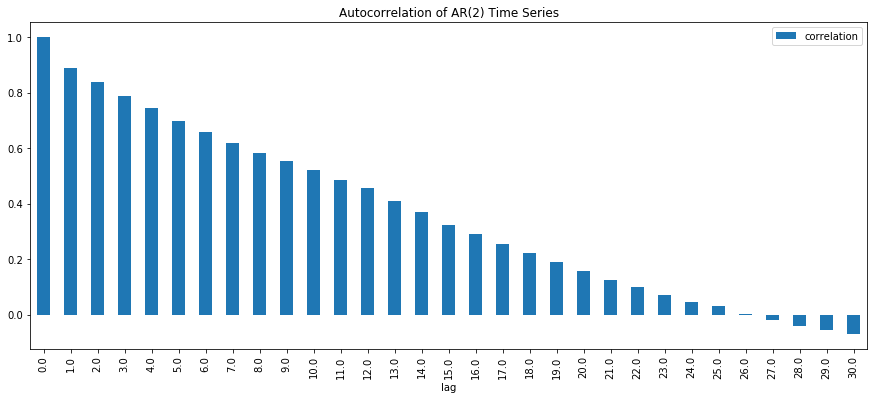

In [33]:
acfX = sts.acf(X['value'])
acfXframe = pd.DataFrame(np.array([np.array(range(len(acfX))),acfX]).T,columns=['lag','correlation'])
acfXframe[acfXframe["lag"]<=30].plot(x="lag",y="correlation",kind="bar",figsize=[15,6],title="Autocorrelation of AR(2) Time Series")

Honestly the autocorrelation graph doesn't look that much like what I see in R. You can probably keep fiddling with the settings until they work but I don't think it matters that much. Still, let's try to simulate one manually.

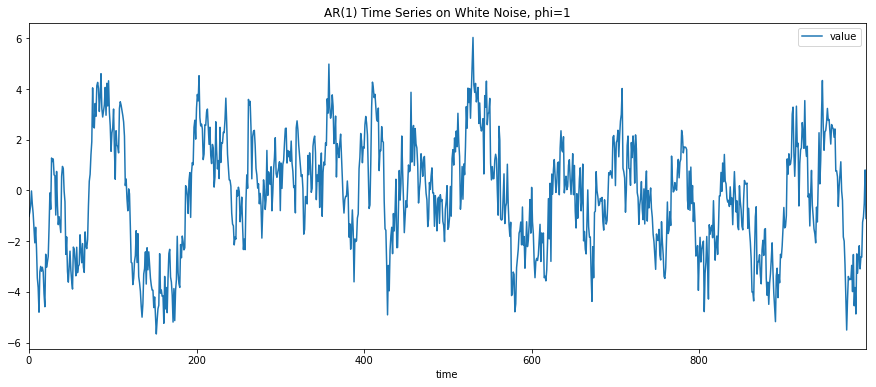

In [35]:
N, phi1,phi2 = 1000, .7, .2
np.random.seed(2017)
Z = np.random.normal(size=N)
X = np.array([0.0 for z in Z])
X[0] = Z[0]
X[1] = Z[1] + phi1 * X[0]
for t in range(1,N):
    X[t] = Z[t] + phi1 * X[t-1] + phi2 * X[t-2]
X = pd.DataFrame(np.array([np.array([i for i in range(len(X))]), X]).T, columns=["time","value"])
X.plot(x="time", y="value", title="AR(1) Time Series on White Noise, phi=1",figsize=[15,6])

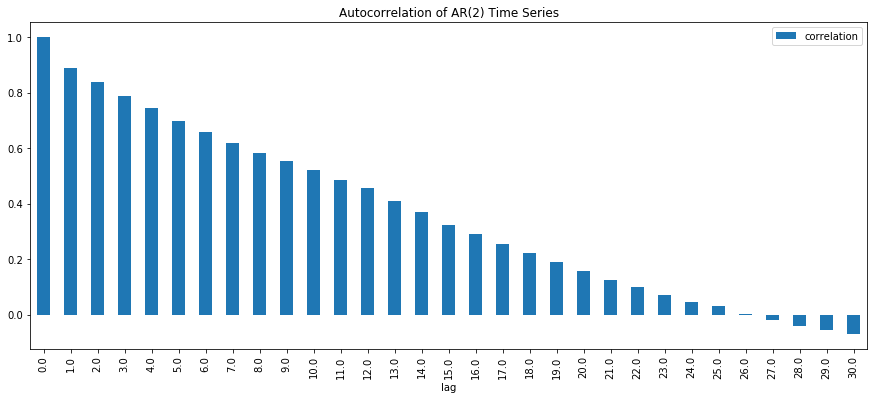

In [36]:
acfX = sts.acf(X['value'])
acfXframe = pd.DataFrame(np.array([np.array(range(len(acfX))),acfX]).T,columns=['lag','correlation'])
acfXframe[acfXframe["lag"]<=30].plot(x="lag",y="correlation",kind="bar",figsize=[15,6],title="Autocorrelation of AR(2) Time Series")

We get exactly the same data we got from using `statsmodels.tsa.arima_process.arma_generate_sample`.

### AR(2) with 0.5, -0.4

Original:
```R
phi1 = .5; phi2 = -.4;
X.ts <- arima.sim(list(ar = c(phi1 , phi2)), n=1000)
par(mfrow=c(2,1))
plot(X.ts,main=paste("AR(2) Time Series, phi1=",phi1, "phi2=", phi2))
X.acf = acf(X.ts, main="Autocorrelation of AR(2) Time Series")
```

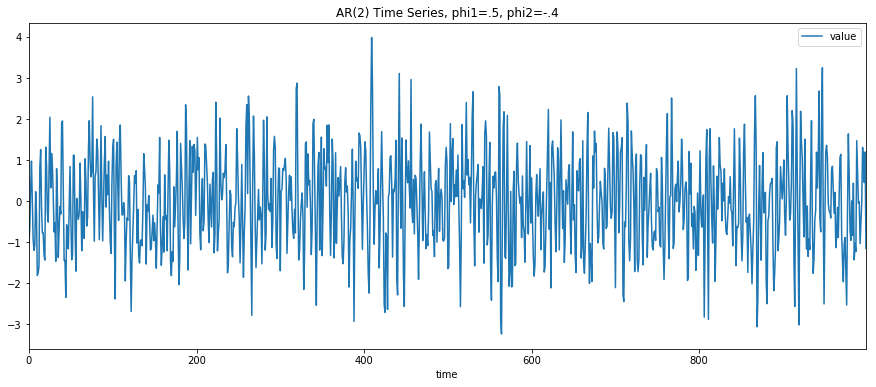

In [37]:
np.random.seed(2017)
X = arimasim(ar=[1,-.5,.4],ma=[1],nsample=1000)
X = pd.DataFrame(np.array([np.array([i for i in range(len(X))]), X]).T, columns=["time","value"])
X.plot(x="time", y="value", title="AR(2) Time Series, phi1=.5, phi2=-.4",figsize=[15,6])

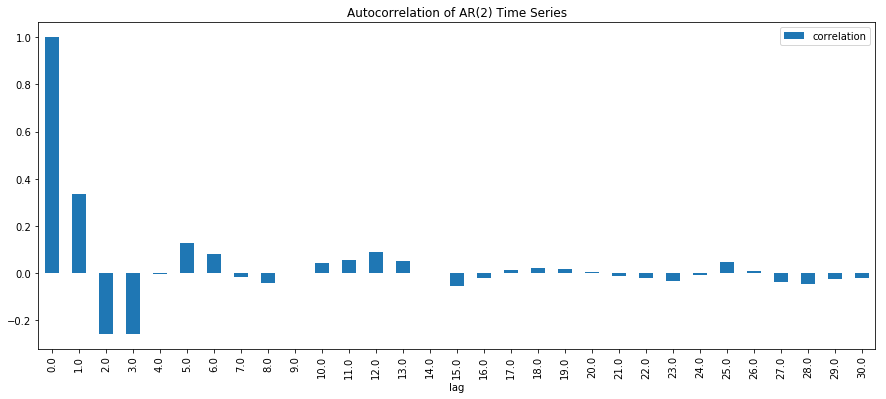

In [38]:
acfX = sts.acf(X['value'])
acfXframe = pd.DataFrame(np.array([np.array(range(len(acfX))),acfX]).T,columns=['lag','correlation'])
acfXframe[acfXframe["lag"]<=30].plot(x="lag",y="correlation",kind="bar",figsize=[15,6],title="Autocorrelation of AR(2) Time Series")

Kinda sorta right?